In [30]:
# Name: Lilli Nappi
# CWID: 20006502
# HW03_KNN

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# Loading csv from canvas & summarize each column
df = pd.read_csv('breast-cancer-wisconsin.csv')
# df.head()
print(df.describe())
df.head(10)

             Sample          F1          F2          F3          F4  \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.706885e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238298e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

               F5          F7          F8          F9       Class  
count  699.000000  699.000000  699.000000  699.000000  699.000000  
mean     3.216023    3.437768    2.866953    1.589413    2.689557  
std      2.214300    2.438364    3.053634    1.715078    0.951273  
min      1.000000    1.000000    1.000000    1.000000    2.000000  
25%      2.000000   

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [23]:
# identify and drop any missing values
df = df.replace([''], None)
missing_values = df.isnull().any()
print(missing_values)

# # # Replace missing values with the mean of the column
df = df.apply(pd.to_numeric, errors='coerce')
df['F6'].fillna(df['F6'].mean(),inplace=True)
df.fillna(df.mean(), inplace=True)
print("\n check for missing value again")
missing_values = df.isnull().any()
print(missing_values)

# change column label to Benign and Malignant
df['Class'] = df['Class'].map({2: 'Benign', 4: 'Malignant'})
# Splitting the dataset
attr = df.drop(columns = ['Class'])  # features
target = df['Class']  # target variable
# attr.head()
target.head()

Sample    False
F1        False
F2        False
F3        False
F4        False
F5        False
F6        False
F7        False
F8        False
F9        False
Class     False
dtype: bool

 check for missing value again
Sample    False
F1        False
F2        False
F3        False
F4        False
F5        False
F6        False
F7        False
F8        False
F9        False
Class     False
dtype: bool


<ipython-input-23-b624398d097b>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['F6'].fillna(df['F6'].mean(),inplace=True)


,Class
0,Benign
1,Benign
2,Benign
3,Benign
4,Benign


In [24]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the data
attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)
attr.head()

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,0.070067,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0
1,0.070285,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0
2,0.071217,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0
3,0.071281,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0
4,0.071336,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0


In [25]:
attr_train, attr_test, target_train,target_test  = train_test_split(attr, target,test_size = 0.3, random_state = 3, shuffle = True)
target_train.head()
# attr_train.head()
target_test.head()

,Class
386,Malignant
330,Malignant
637,Benign
647,Benign
469,Benign


In [26]:
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_values = [3, 5, 10]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
#     knn = KNeighborsClassifier(n_neighbors = k,weights='distance')
    knn.fit(attr_train, target_train)
    target_pred = knn.predict(attr_test)
#     accuracy = round(np.mean(target_test==target_pred ) * 100, 2)
    accuracy = accuracy_score(target_test,target_pred )
    print(f'Accuracy of model with k = {k}: {accuracy}%')
    print('')

Accuracy of model with k = 3: 0.9666666666666667%

Accuracy of model with k = 5: 0.9714285714285714%

Accuracy of model with k = 10: 0.9619047619047619%



In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(target_test, target_pred)

print('Confusion Matrix')
print(confusion_matrix(target_test, target_pred))
print()
print('Accuracy score')
print(accuracy_score(target_test, target_pred))
print()
print('Classification Report')
print(classification_report(target_test, target_pred))


Confusion Matrix
[[126   4]
 [  4  76]]

Accuracy score
0.9619047619047619

Classification Report
              precision    recall  f1-score   support

      Benign       0.97      0.97      0.97       130
   Malignant       0.95      0.95      0.95        80

    accuracy                           0.96       210
   macro avg       0.96      0.96      0.96       210
weighted avg       0.96      0.96      0.96       210



In [28]:
# target_pred.head()
attr_test['target_pred']=target_pred
# print(target_test)
attr_test['target_actual']= target_test
attr_test.head()


,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,target_pred,target_actual
386,0.076056,0.666667,0.555556,0.555556,0.222222,0.111111,1.000000,0.666667,0.0,0.0,Malignant,Malignant
330,0.001102,1.000000,0.333333,0.666667,0.111111,0.111111,0.777778,0.555556,0.0,0.0,Malignant,Malignant
637,0.090659,0.333333,0.111111,0.333333,0.222222,0.111111,0.111111,0.111111,0.0,0.0,Benign,Benign
647,0.093295,0.000000,0.000000,0.000000,0.222222,0.111111,0.000000,0.000000,0.0,0.0,Benign,Benign
469,0.083631,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.111111,0.0,0.0,Benign,Benign


[Text(0, 0.5, 'Benign'), Text(0, 1.5, 'Malignant')]

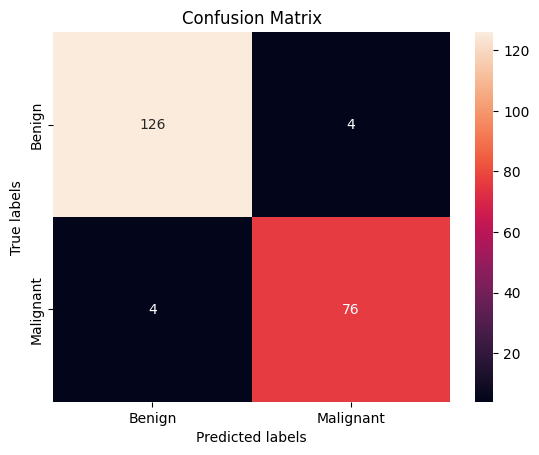

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax.yaxis.set_ticklabels(['Benign', 'Malignant'])